# Multiple Regression

Let's grab a small little data set of Blue Book car values:

In [119]:
import pandas as pd

df = pd.read_excel('cars.xls')


                     Mileage         Price
Mileage                                   
(0, 10000]       5588.629630  24096.714451
(10000, 20000]  15898.496183  21955.979607
(20000, 30000]  24114.407104  20278.606252
(30000, 40000]  33610.338710  19463.670267


<AxesSubplot:xlabel='Mileage'>

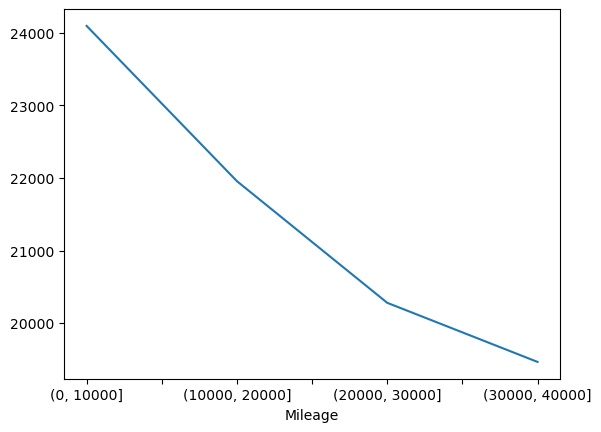

In [120]:
%matplotlib inline
import numpy as np
df1=df[['Mileage','Price']] # select two columns
bins =  np.arange(0,50000,10000) # create bins strating from 0 to 50000 with 10000 interval
groups = df1.groupby(pd.cut(df1['Mileage'],bins)).mean() # group by bins and calculate mean of each group 
print(groups.head()) # print first 5 rows
groups['Price'].plot.line()# plot line chart


We can use pandas to split up this matrix into the feature vectors we're interested in, and the value we're trying to predict.

Let's scale our feature data into the same range so we can easily compare the coefficients we end up with.

In [121]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X = df[['Mileage', 'Cylinder', 'Doors']]
y = df['Price']

# standardisation
X[['Mileage', 'Cylinder', 'Doors']] = scale.fit_transform(X[['Mileage', 'Cylinder', 'Doors']].values)

print (X)

#Ordinary Least Squares to create the model
est = sm.OLS(y, X).fit()

est.summary()

# Mathmatical formula for the model is Price = a*Mileage + b*Cylinder + c*Doors + cte
# replace 0.0001 with the coefficient values from the summary table

#Price = -1272.3412 * Mileage + 5587.4472 * Cylinder + (-1404.5513) * Doors

Mileage= X['Mileage']
Cylinder = X['Cylinder']
Doors= X['Doors']

Price= (-1272.3412)* Mileage + 5587.4472 * Cylinder + (-1404.5513) * Doors
print("Price NEW : ",Price)

# the most important feature is Cylinder with coefficient 5587.4472 compared to Mileage and Doors


      Mileage  Cylinder     Doors
0   -1.417485   0.52741  0.556279
1   -1.305902   0.52741  0.556279
2   -0.810128   0.52741  0.556279
3   -0.426058   0.52741  0.556279
4    0.000008   0.52741  0.556279
..        ...       ...       ...
799 -0.439853   0.52741  0.556279
800 -0.089966   0.52741  0.556279
801  0.079605   0.52741  0.556279
802  0.750446   0.52741  0.556279
803  1.932565   0.52741  0.556279

[804 rows x 3 columns]
Price NEW :  0      3969.080640
1      3827.109147
2      3196.314584
3      2707.646843
4      2165.545631
          ...     
799    2725.199118
800    2280.023738
801    2064.270562
802    1210.732979
803    -293.326059
Length: 804, dtype: float64


/tmp/ipykernel_24030/630331562.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Mileage', 'Cylinder', 'Doors']] = scale.fit_transform(X[['Mileage', 'Cylinder', 'Doors']].values)


Explain the code above and the obtained results (look for the significance of each measure)... ?
What can you deduce when comparing the obtained coefficients ?


    
Now, lets find out if the number of doors is important in predicting car prices:

In [122]:
y.groupby(df.Doors).mean()

# the Doors feature is important because the mean of the price is getting lower is we add more doors for each group


Doors
2    23807.135520
4    20580.670749
Name: Price, dtype: float64


How would you use the learned model to make an actual prediction? Start by scaling your multiple feature variables into the same scale used to train the model, then just call est.predict() on the scaled features:

In [123]:
#Prediction for a car with 45000 Mileage, 8 cylinders and 4 doors
scaled = scale.transform([[45000, 8, 4]])
print(scaled)
predicted = est.predict(scaled[0])
print("predicted",predicted)

#Prediction for a car with 10000 Mileage, 12 cylinders and 2 doors
scaled = scale.transform([[10000, 12, 3]])
print(scaled)
predicted2 = est.predict(scaled[0])
print("predicted",predicted2)

[[3.07256589 1.96971667 0.55627894]]
predicted [6315.01330583]
[[-1.20030142  4.85432905 -0.62069018]]
predicted [29522.29155041]


## Activity

- Create a copy of the input data on your disk, and see if you can create a measurable influence of number of doors on price. 
- Look if there are Outliers in the dataset, if yes, do some data cleaning.
- Try adding 8 door cars into the set and see how it affects the results.

        Doors         Price
Doors                      
(0, 2]    2.0  23807.135520
(2, 4]    4.0  20580.670749


<AxesSubplot:xlabel='Doors'>

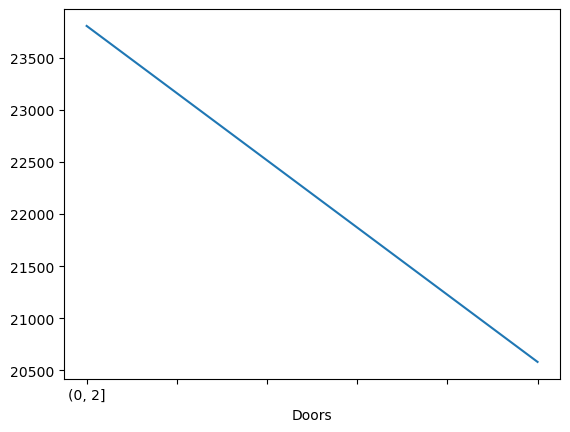

In [124]:
# the copy of the data is available and named as cars-copy.xls

%matplotlib inline
import numpy as np
df2=df[['Doors','Price']]
bins2 =  np.arange(0,5,2)
groups2 = df2.groupby(pd.cut(df2['Doors'],bins2)).mean()
print(groups2.head())
groups2['Price'].plot.line()



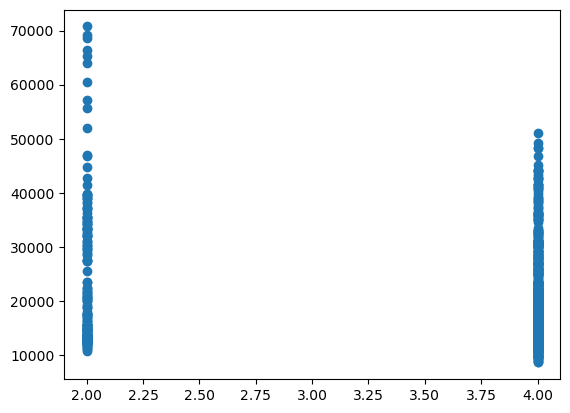

In [125]:
#looking for the outliers
import matplotlib.pyplot as plt
plt.scatter(df2['Doors'], df2['Price'])
plt.show()


In [126]:
# prediction for a car with 45000 Mileage, 8 cylinders and 4 doors
scaled = scale.transform([[45000, 8, 4]])
print(scaled)
predicted = est.predict(scaled[0])
print(predicted)

[[3.07256589 1.96971667 0.55627894]]
[6315.01330583]


/tmp/ipykernel_24030/4256269263.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df.append(new_car)


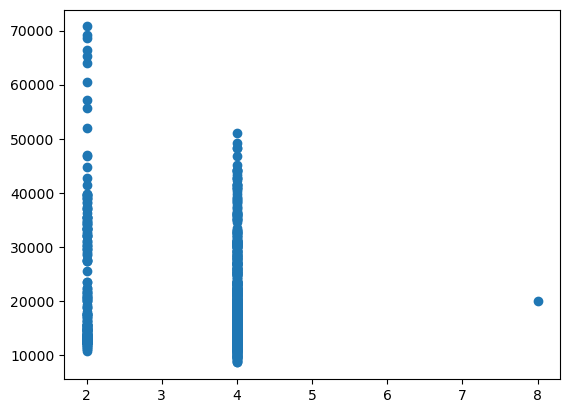

In [127]:
# adding a new car with 45000 Mileage, 8 cylinders and 8 doors to the data and re-run the model 
# Create new row for the new car
new_car = pd.DataFrame({'Mileage': 30000, 'Cylinder': 6, 'Doors': 8, 'Price': 20000}, index=[len(df)])

# Append the new row to the dataframe
df2 = df.append(new_car)

# Reset the index of the dataframe
df2 = df2.reset_index(drop=True)
df2.tail()

import matplotlib.pyplot as plt
plt.scatter(df2['Doors'], df2['Price'])
plt.show()


In [128]:
X = df2[['Mileage', 'Cylinder', 'Doors']]
y = df2['Price']

X[['Mileage', 'Cylinder', 'Doors']] = scale.fit_transform(X[['Mileage', 'Cylinder', 'Doors']].values)
print (X)
est2 = sm.OLS(y, X).fit()
est2.summary()


      Mileage  Cylinder     Doors
0   -1.418552  0.526992  0.540851
1   -1.307007  0.526992  0.540851
2   -0.811398  0.526992  0.540851
3   -0.427457  0.526992  0.540851
4   -0.001533  0.526992  0.540851
..        ...       ...       ...
800 -0.091478  0.526992  0.540851
801  0.078037  0.526992  0.540851
802  0.748653  0.526992  0.540851
803  1.930377  0.526992  0.540851
804  1.239380  0.526992  5.172607

[805 rows x 3 columns]


/tmp/ipykernel_24030/2269962264.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Mileage', 'Cylinder', 'Doors']] = scale.fit_transform(X[['Mileage', 'Cylinder', 'Doors']].values)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.063
Model:                            OLS   Adj. R-squared (uncentered):              0.060
Method:                 Least Squares   F-statistic:                              18.10
Date:                Fri, 24 Feb 2023   Prob (F-statistic):                    2.25e-11
Time:                        18:11:54   Log-Likelihood:                         -9218.5
No. Observations:                 805   AIC:                                  1.844e+04
Df Residuals:                     802   BIC:                                  1.846e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mileage    -1265.2065    803.920     -1.574      0.116   -2843.243     312.830
Cylinder    5588.0550    803.903      6.951      0.000    4010.053    7166.057
Doors      -1397.4940    803.604     -1.739      0.082   -2974.909     179.921
==============================================================================
Omnibus:                      158.890   Durbin-Watson:                   0.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              259.920
Skew:                           1.281   Prob(JB):                     3.62e-57
Kurtosis:                       4.089   Cond. No.                         1.03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [129]:
# prediction for a car with 45000 Mileage, 8 cylinders and 4 doors
scaled = scale.transform([[45000, 8, 4]])
print(scaled)
predicted = est2.predict(scaled[0])
print(predicted)

# old prediction before adding the new car is 6315.01330583 and the new prediction is 6368.14767781
# the new prediction is higher than the old one because the new car is an outlier

[[3.06999624 1.96994534 0.54085102]]
[6368.14767781]


/tmp/ipykernel_24030/3272962185.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df2.append(new_car)


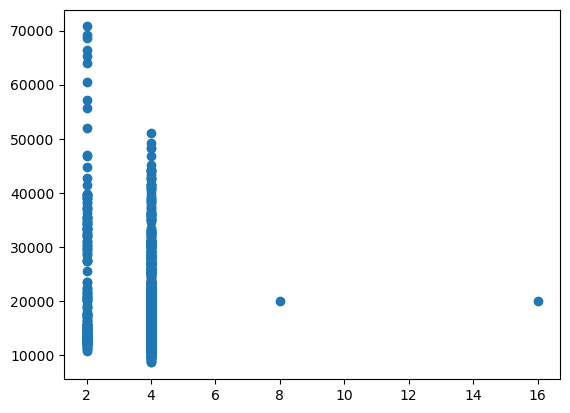

      Mileage  Cylinder      Doors
0   -1.419620  0.526574   0.466428
1   -1.308111  0.526574   0.466428
2   -0.812666  0.526574   0.466428
3   -0.428852  0.526574   0.466428
4   -0.003070  0.526574   0.466428
..        ...       ...        ...
801  0.076474  0.526574   0.466428
802  0.746868  0.526574   0.466428
803  1.928200  0.526574   0.466428
804  1.237432  0.526574   4.597643
805  1.237432  0.526574  12.860073

[806 rows x 3 columns]


/tmp/ipykernel_24030/3272962185.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Mileage', 'Cylinder', 'Doors']] = scale.fit_transform(X[['Mileage', 'Cylinder', 'Doors']].values)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.063
Model:                            OLS   Adj. R-squared (uncentered):              0.059
Method:                 Least Squares   F-statistic:                              17.94
Date:                Fri, 24 Feb 2023   Prob (F-statistic):                    2.80e-11
Time:                        18:13:16   Log-Likelihood:                         -9230.1
No. Observations:                 806   AIC:                                  1.847e+04
Df Residuals:                     803   BIC:                                  1.848e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mileage    -1241.9444    803.551     -1.546      0.123   -2819.252     335.363
Cylinder    5593.8940    803.564      6.961      0.000    4016.560    7171.228
Doors      -1288.6922    803.312     -1.604      0.109   -2865.532     288.148
==============================================================================
Omnibus:                      166.295   Durbin-Watson:                   0.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              279.293
Skew:                           1.312   Prob(JB):                     2.25e-61
Kurtosis:                       4.196   Cond. No.                         1.03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [133]:
# lets add another new car with 45000 Mileage, 8 cylinders and 16 doors to the data and re-run the model
# Create new row for the new car
new_car = pd.DataFrame({'Mileage': 30000, 'Cylinder': 6, 'Doors': 16, 'Price': 20000}, index=[len(df)])

# Append the new row to the dataframe
df3 = df2.append(new_car)

# Reset the index of the dataframe
df3 = df3.reset_index(drop=True)
df3.tail()

import matplotlib.pyplot as plt
plt.scatter(df3['Doors'], df3['Price'])
plt.show()


X = df3[['Mileage', 'Cylinder', 'Doors']]
y = df3['Price']

X[['Mileage', 'Cylinder', 'Doors']] = scale.fit_transform(X[['Mileage', 'Cylinder', 'Doors']].values)
print (X)
est3 = sm.OLS(y, X).fit()
est3.summary()


In [134]:
# prediction for a car with 45000 Mileage, 8 cylinders and 4 doors
scaled = scale.transform([[45000, 8, 4]])
print(scaled)
predicted = est3.predict(scaled[0])
print(predicted)

# old prediction before adding the new car is 6315.01330583 and the prediction after adding 8 doors car is 6368.14767781
# and the prediction after adding 16 doors car is 6610.27514813
# the new prediction is higher than the old one because the new car is an outlier

[[3.06744227 1.97017489 0.46642753]]
[6610.27514813]
